<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/TransformersDecoderArchitecture(MaskedSelfAttention).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transformer Architecture-**

We have encoder and decoder blocks in the transformer.

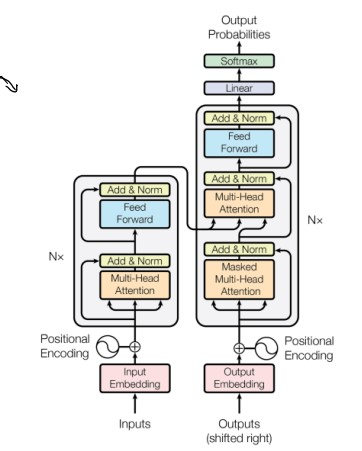

**Autoregressive Models-**

Inference simply means prediction.

Autoregressive word came from time-series type of models in which output of current time step is dependant on the prediction of previous time-steps output. Let we have LSTM model of stock market prediction . We predicted stock price on monday as 29 and tuesday as 30 then model is dependant on the prediction of monday and tuesday for prediction of stock price on wednesday.Such models are known as Autoregressive models.

In the context of deep learning , autoregressive models are a class of models that generate dtat points in a sequence by conditioning each new point on the previously generated points.

**The transformer decoder is autoregressive at inference time and non-autoregressive at training time.**

Decoder architecture should be autoregressive at both inference and training time , but is is not. The resason behind it is **"Masked Self Attention"**.

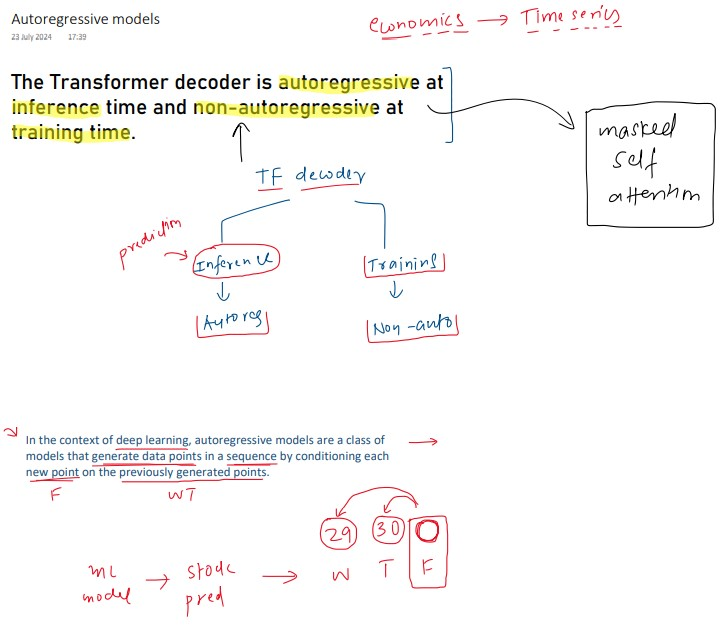

**Transformer as an Autoregressive Model-**

We have a sentence **"The transformer decoder is autoregressive at inference time and non-autoregressive at training time."**

To prove the above sentence , we will consider that transformer decoder architecture is autoregressive at both inference time and at training time.

Let we are building a deep learning model of machine translation of english to hindi.We trained the model on perticular dataset and now we are ready to get the prediction on unseen data.



**We are getting prediction of the model-**

We are giving "I am fine" as input to the machine translation model. We will pass this input sentence to the encoder part.This encoder will give us 3 different vectors for each word in input sentence  of contextual word embeddings output.

There will be different time steps of decoder in which we wil be getting the output translation. FOr 1st time step , we got "mai",for 2nd time step we got "ghatiya" which is a wrong translation of "fine" and at 3rd time step we got "hu" and then we got "end" which tells us to stop the prediction.Our expected output was "Mai badhiya hu" but we got machine translation output as "Mai ghatiya hu".

**Now we will see the training of the model-**

Dataset for training is -

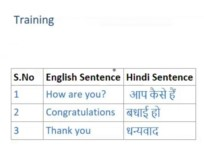



Take sentence 1 "How are you?".We will send this sentence to the encoder part of the transformer parallely and we will get the output of the encoder model in form of contextual word embedding vectors for each word. At first time step , decoder architecture gave "tum" as output but the correct output is "aap".Though we got wrong result of 1st time step as "tum" but we will still send the correct output to the next time step which is "Aap". We got output as "kaise" in 2nd time step which is correct. We got "the" as output in 3rd time step which is incorrect.So in 4th step , we will stil send correct translation as "hai" to 5th time step and got "end" as output which suggest to stop the prediction.So in the end we should have got output as "Aap kaise hai?" we got model output as "Tum kaise the?".Now we have to apply apply loss function and optimize the loss function and after applying the backpropogation , we have to update the weights.Then we will go to the next sentence in training data and repeat this process.This process suggest that the training of the model is also "Autoregressive" which means training of each  next step is dependant on the training of previous steps.

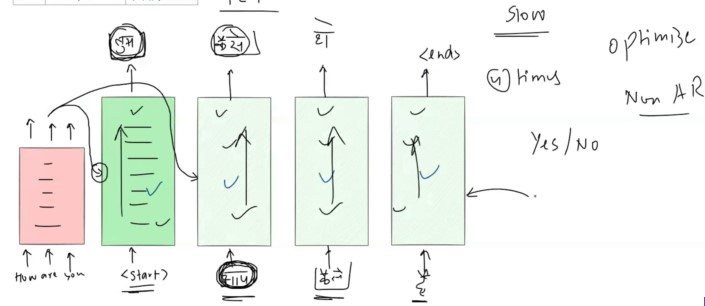

If we think our consideration of keeping training of the decoder model as autoregressive , the training of the decoder model will become very slow.If out data contains millions of words , it will take more time to train the model.

We dont have any other option than keeping the transformer decoder autoregressive becuase at each time step we have to give the output of previous step to the next step for getting an output. But keeping the transformer decoder architecture autoregressive is not compulsory becuase even if we get the wrong output from the model at any time step of training , we are giving the input to next step from training dataset availble. And training dataset is always available with us. So while training we can pass the whole sentence parallely and get the output.

So our sentence of "**The transformer decoder is autoregressive at inference time and non-autoregressive at training time**" stnds true.

Now our sole aim is to figure out how can we pass the traininig sentence parallely.



**Masked Multihead Attention In Transformer Decoder Architecture-**

There is "Masked Multihead Attention" in decoder block.Just to simplify , we will consider "Masked Multihead Attention" as "self_attention" block.

Basically what self_attention block does is it creates the contextual word embeddings of the input dataset sentence words which undrstands the  existing of a perticular word with other words in the sentence which means if we have a contextual word embeddings of a perticular word , then is has the information of other words present in the sentence.


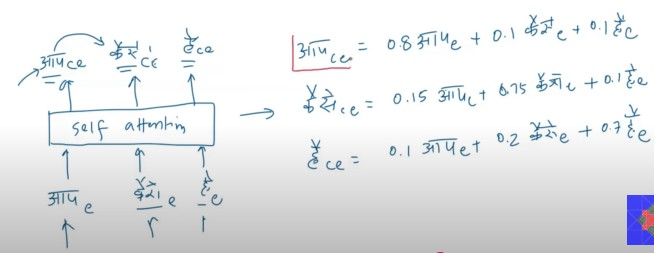



So here we have represented the contextual word embeddings of word "aap" with the equation which contains contextual word embeddings of future words like contextual word embeddings of words "kaise" and "hai".During prediction , when we are writing the contextual word embeddings of word "aap" , we donts have the next time step prediction which is going to be "kaise".At output of "aap" time step , we dont know the ouput of model at next time stpe whether it will be "kaise" or anything else.We are writing the current token value with future token value.This is like nothing but aksing our model to cheat by telling him the next prediction while writing the contextual word embeddings of perticular word in a equation of contextual word embeddings of the other words present in the data.If such prediction mechanism we use then we will get better accuracy on training data and poor accuracy on test data and this is standard example of data leackage.

**Now the situation we find ourself is-**

We are stucked now.When we trained the model by using autoregressive technique , there was no problem of data leackage but the training of the model of slow.

So we thought of non-autoregressive training technique then the training speed was increased but new problem arised and that problem is Data Leackage.So in both the process of training , we are getting some other problem.

Do we have a middle way of training the decoder architecture of transformer by which we dont get any problem? Yes , we do have . For that solution we will have to go deep inside of how part of self_attention.

**Finding The Answer of Situation We are Stucked In-**

We have sentence as "Aap kaise hai". We find out word embeddings of each word as aape , kaisee and haie. We create a three weight metrices as Wq , Wk and Wv which when multiplied with word embeddings , we got 3 different vectors which will play the role of query , key and value in calculation of the contextual word embeddings. When we dot product of word embedding of aap with these three weight metrices , we will get 3 new vectors for each word in the input sentence.


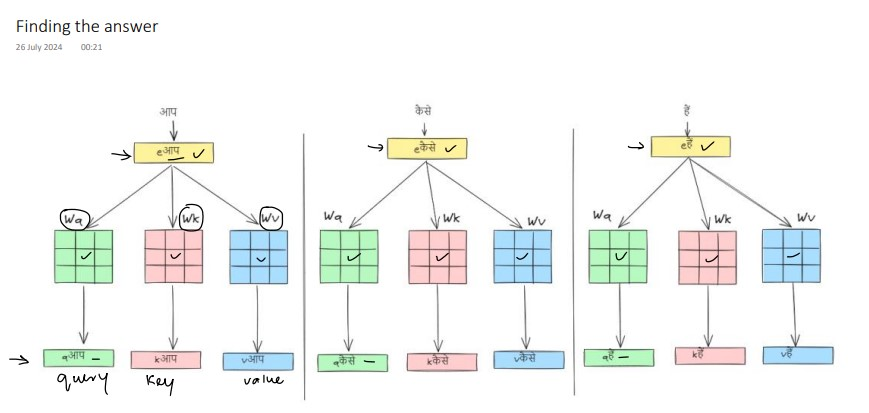

WWe stack up the three vectors of different word and create a metrix of 3 * 1. Then we perform the matrix operations as follows.

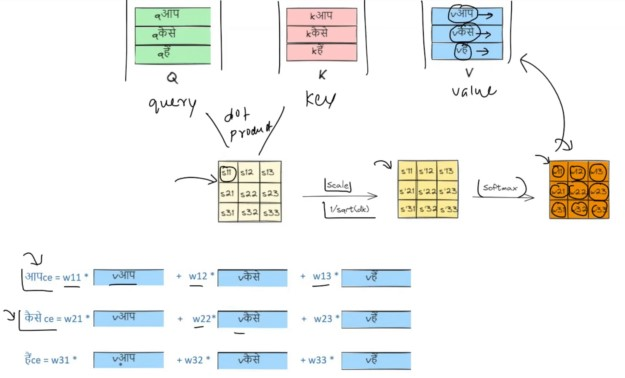





Now comes the moment , what we dont need?
While calculation of contextual word embedding of word "aap",we dont need the contribution of contextual word embeddings of other two words i.e. "kaise" and "hai".So in a way we need to make the contextual word embedding of "kaise" and "hai" as 0 while calculating the contextual word embedding of word "aap".So to make it 0 , we will add one morre step as follows.

After calculation of scaled matrix , we add the scaled matrix with "mask" matrix whose values are as shown in below image. We have -infinity because when we add something in -infinity , it remains -infinty and the resulting matrix that we get is according to the required values where we didnt want contextual word embeddings of the other words while calculating the contextual word embeddings of the current word.

So in this way we have removed the dependency on other words while calculation of contextual word embeddings of current word . And in this way we can perform the parallel processing of the training of model.

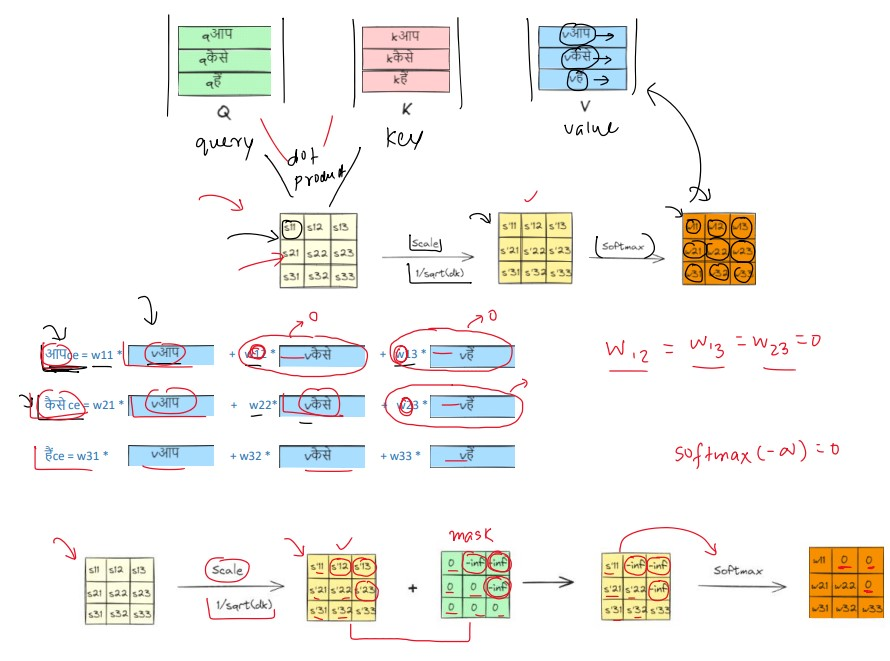


In this way Masked Attention will solve the problem of not having autoregressive model yet having a parallel processing.Since we have done the masking , our current token is not able to get the information of future tokens which removes the problem of Data Leackage.And hence we have achieved the non-autoregressive modelling in training process.